# Примеры визуализации данных в Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Создаем цветорую палитру

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# make own corol map
newcolors = ['#21A038','#0087CD','#00D900', '#FAED00',  '#42E3B4','#21BA72'] # make own color list
sbercmp = ListedColormap(newcolors)
# image params preset
image_params = dict(figsize=(10,5), 
                color=newcolors)

## Let's start!

<AxesSubplot:>

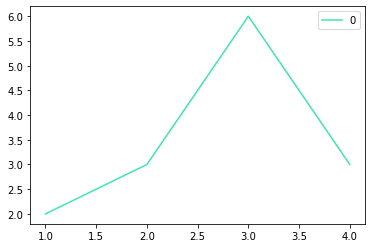

In [3]:
y = [2,3,6,3]
x = [1,2,3,4]
df = pd.DataFrame(y,x)
df.plot(kind="line", color=newcolors[4])

<AxesSubplot:ylabel='Density'>

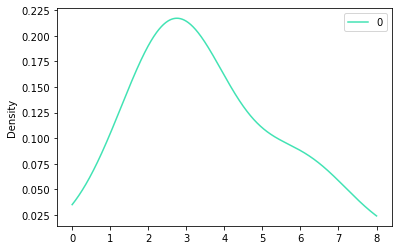

In [4]:
df.plot(kind="kde", color=newcolors[4])  # !!! density == kde

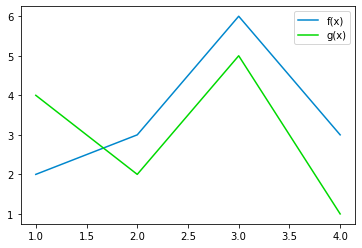

In [5]:
y = {"f(x)":[2,3,6,3], "g(x)":[4,2,5,1],}
x = [1,2,3,4]
df = pd.DataFrame(y,x)
df.plot(kind="line", color=newcolors[1:3]);

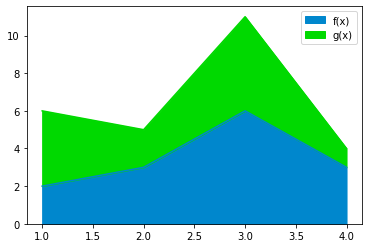

In [6]:
df.plot(kind="area", color=newcolors[1:3]);

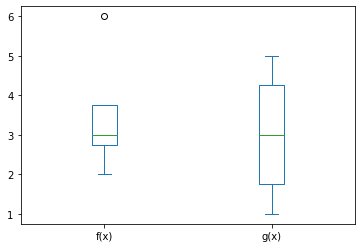

In [7]:
df.plot(kind="box");

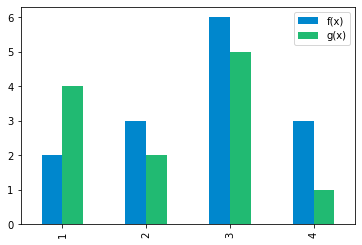

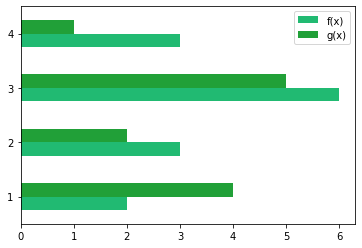

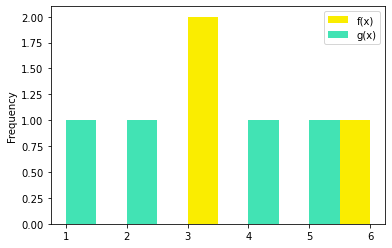

In [8]:
kindes = ['bar','barh','hist' ] 

df = pd.DataFrame(y,x)
for k in kindes:
    df.plot(kind=k, color=np.random.choice(newcolors, size=2, replace=False))

In [9]:
# добавляем (дублируем) x для некоторых графиков
df['x']=x
df

,f(x),g(x),x
1,2,4,1
2,3,2,2
3,6,5,3
4,3,1,4


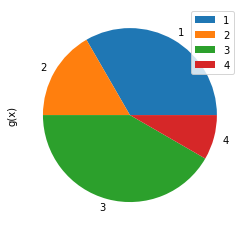

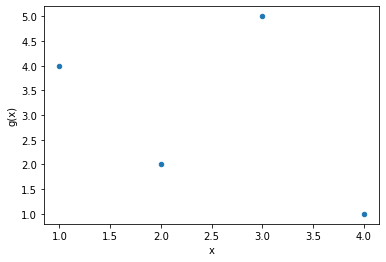

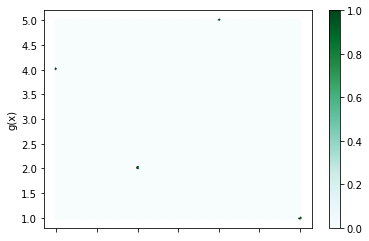

In [10]:
#df.plot(kind='hexbin', x='x', y='g(x)')
kindes = ['pie','scatter', 'hexbin']
for k in kindes:
    df.plot(kind=k, x='x', y='g(x)')

## Plot

In [11]:
samples = np.random.randn(1000, 4)
samples[100:200] = None

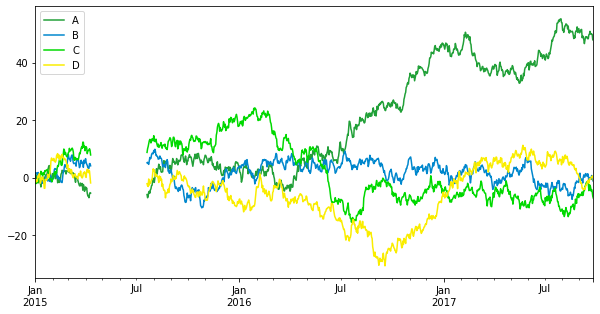

In [12]:
df = pd.DataFrame(samples, 
                  index=pd.date_range("1/1/2015", periods=1000),
                  columns=list("ABCD"))

df = df.cumsum()

df.plot(**image_params);

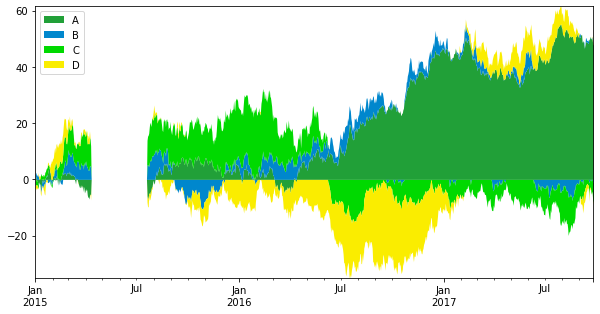

In [13]:
fig, ax = plt.subplots()
# split dataframe df into negative only and positive only values
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
# stacked area plot of positive values
df_pos.plot.area(ax=ax, stacked=True, linewidth=0., **image_params); # linewidth=0. eliminate contour line

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, linewidth=0., **image_params);
# rescale the y axis
ax.set_ylim([df_neg.sum(axis=1).min(), df_pos.sum(axis=1).max()]);

## Bar & Barh

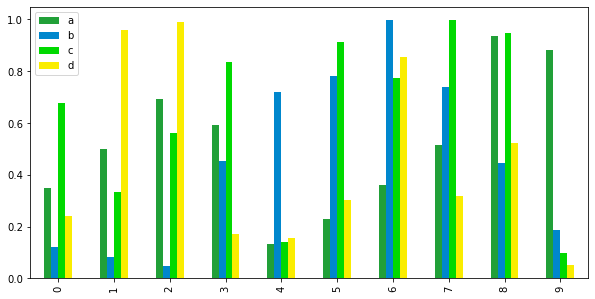

In [14]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar(**image_params)
plt.show()

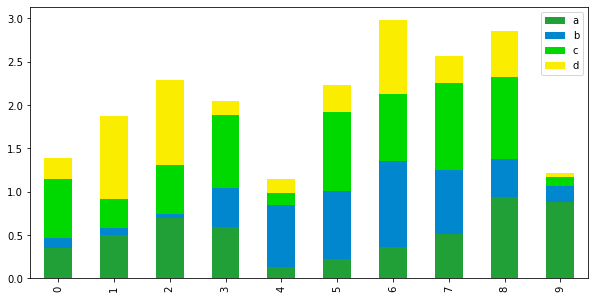

In [15]:
df2.plot.bar(**image_params,stacked=True)
plt.show()

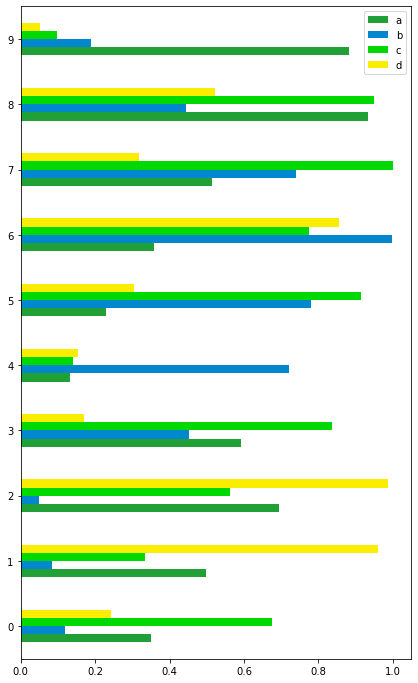

In [16]:
image_params_h = dict(figsize=(7,12), 
                color=newcolors)
df2.plot.barh(**image_params_h)
plt.show()

# Histograms

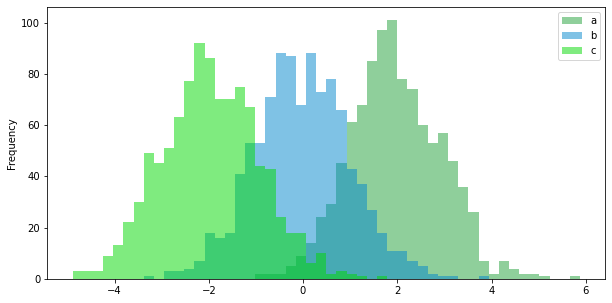

In [17]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 2,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 2,
    },
    columns=["a", "b", "c"],
)

df4.plot.hist(**image_params, alpha=0.5, bins=50);

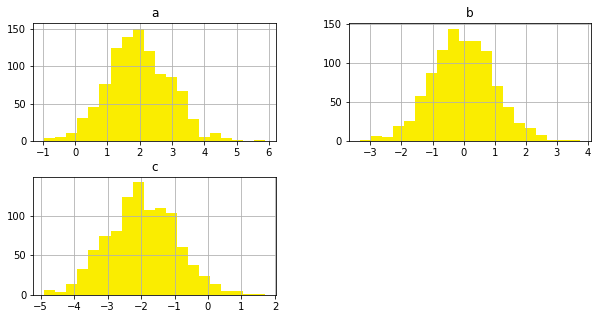

In [18]:
df4.hist(figsize=(10,5), 
                color=newcolors[3],  bins=20)
plt.show()

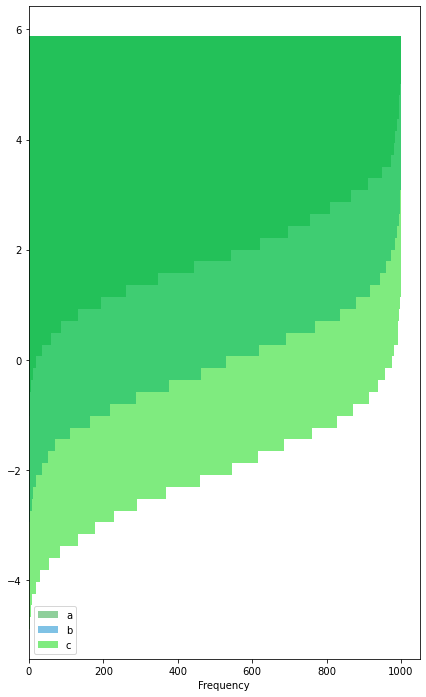

In [19]:
df4.plot.hist(orientation="horizontal", **image_params_h, alpha=0.5, bins=50, cumulative=1);


## Density plot (aka KDE)

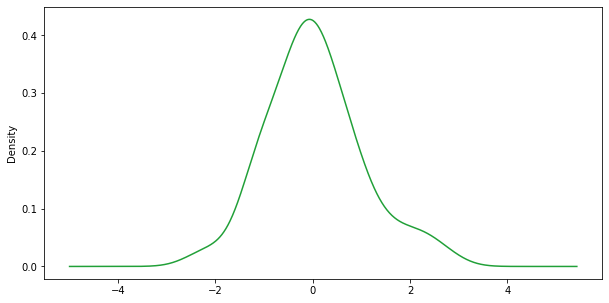

In [20]:
ser = pd.Series(np.random.randn(100))

ser.plot.kde(**image_params);

## Scatter plot

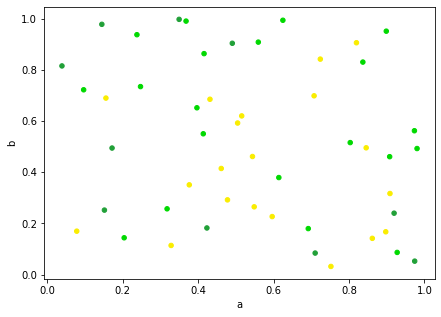

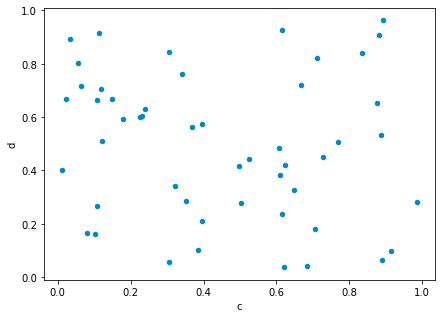

In [21]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)

species_colors = {"setosa" : newcolors[3],
                 "versicolor" : newcolors[2],
                 "virginica" : newcolors[0]}
df["sp"] = df["species"].apply(lambda x:species_colors[x] )

df.plot.scatter(x="a", y="b",figsize=(7,5), 
                color=df["sp"]);
df.plot.scatter(x="c", y="d", figsize=(7,5), 
                color=newcolors[1]);

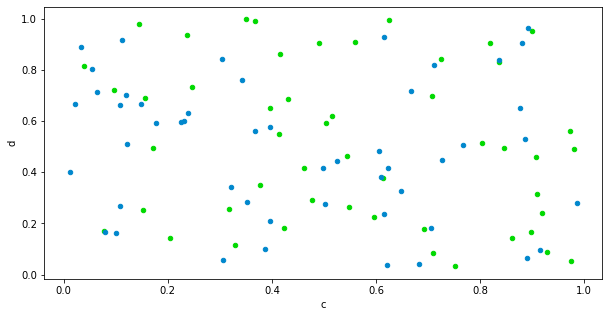

In [22]:
ax = df.plot.scatter(x="a", y="b",figsize=(7,5), 
                color=newcolors[2]);
df.plot.scatter(x="c", y="d", figsize=(10,5), 
                color=newcolors[1], ax=ax);

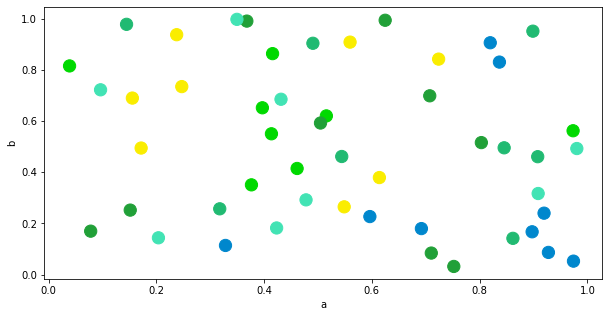

In [23]:
nc = newcolors*(len(df)//len(newcolors)+1)
nc = nc[0:len(df)]
df.plot.scatter(x="a", y="b", c=nc, cmap=sbercmp, figsize=(10,5),s=150);


## Box plot

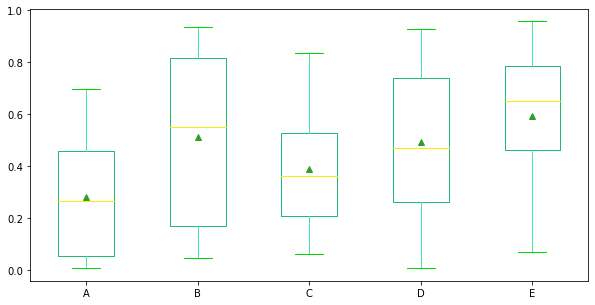

In [24]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

box_color_settings = dict(zip(["boxes", "whiskers",  "medians", "caps"], newcolors[::-1]))
    
df.plot.box(figsize=(10,5), color=box_color_settings, showmeans=True, ); # meanline=True

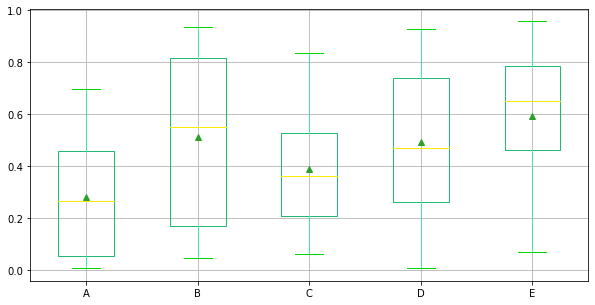

In [25]:
df.boxplot(figsize=(10,5), color=box_color_settings, showmeans=True, ); 

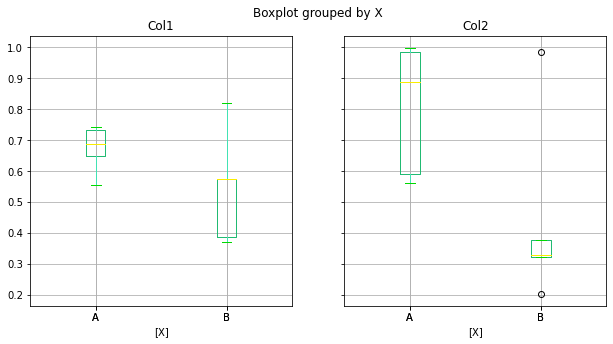

In [26]:
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])

df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])


bp = df.boxplot(by="X", figsize=(10,5), color=box_color_settings);

In [27]:
df

,Col1,Col2,X
0,0.732357,0.562567,A
1,0.744419,0.886954,A
2,0.687558,0.590214,A
3,0.555356,0.984783,A
4,0.651006,0.997712,A
5,0.388940,0.986056,B
6,0.370741,0.324901,B
7,0.576597,0.205560,B
8,0.821473,0.331042,B
9,0.574843,0.378915,B


## Pie plot

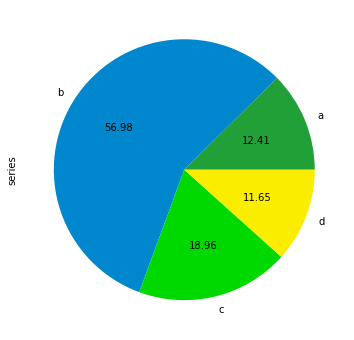

In [28]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6), autopct="%.2f", colors=newcolors);  #coloirS !!!

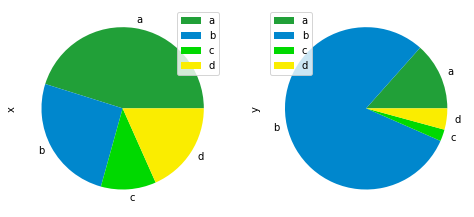

In [29]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)


df.plot.pie(subplots=True, figsize=(8, 4), colors=newcolors);

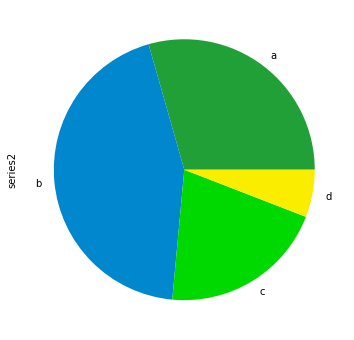

In [30]:
series = pd.Series([.1, .15, .07, .02], index=["a", "b", "c", "d"], name="series2")

series.plot.pie(figsize=(6, 6),  colors=newcolors);

## Hexagonal bin plot

In [31]:
newcolors.insert(0,'#FFFFFF')

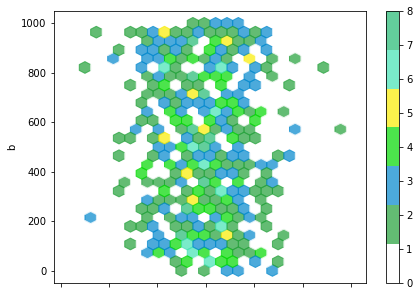

In [32]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

df["b"] = df["b"] + np.arange(1000)

sbercmp_2 = ListedColormap(newcolors)

df.plot.hexbin(x="a", y="b", gridsize=25, figsize=(7,5), cmap=sbercmp_2, alpha=.7);

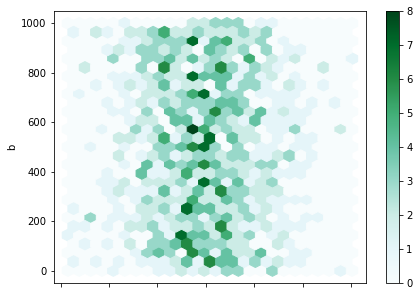

In [33]:
df.plot.hexbin(x="a", y="b", figsize=(7,5),gridsize=25);

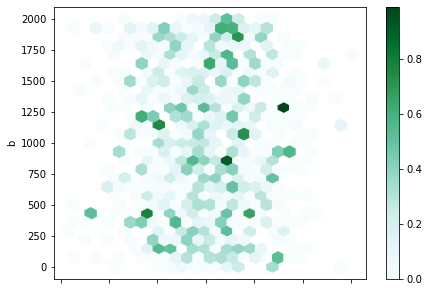

In [34]:
df["z"] = np.random.uniform(1, 3, 1000)
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.var, figsize=(7,5), gridsize=25);

In [35]:
df.head()

,a,b,z
0,0.497028,1.358201,2.152150
1,-0.070912,1.753366,1.273928
2,1.383901,3.241755,1.365704
3,2.705283,6.548157,2.264745
4,0.243036,8.602850,1.249202


## Area plot

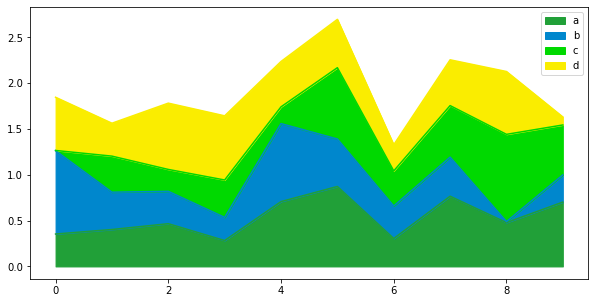

In [36]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
newcolors.remove('#FFFFFF')
df.plot.area(**image_params);

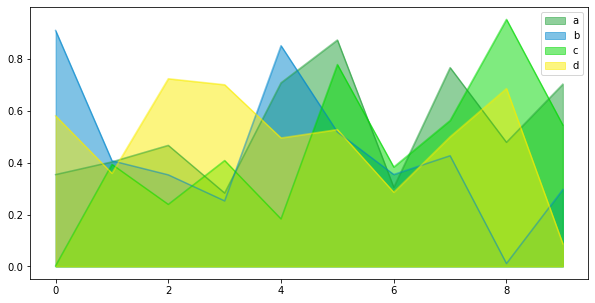

In [37]:
df.plot.area(stacked=False, **image_params);

## Andrews plot (диаграмма Эндрюса)

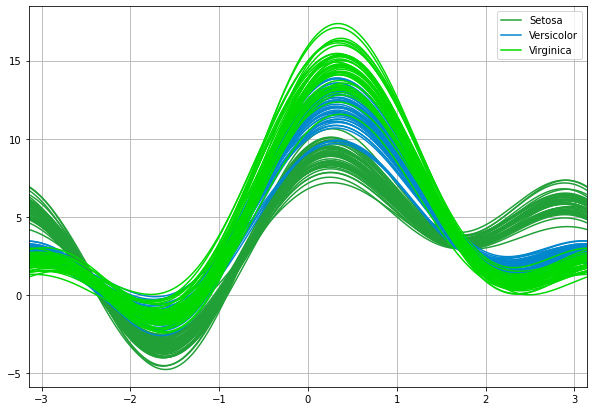

In [38]:
from pandas.plotting import andrews_curves

data = pd.read_csv("iris.csv")
plt.figure(figsize=(10,7));

andrews_curves(data, "variety", color=newcolors);

## RadViz

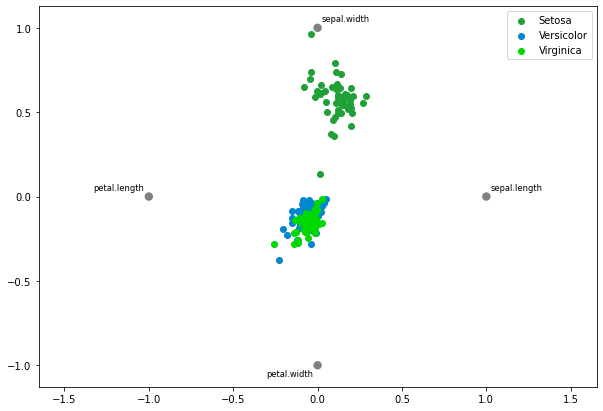

In [39]:
from pandas.plotting import radviz

data = pd.read_csv("iris.csv")
plt.figure(figsize=(10,7));

radviz(data, "variety", color=newcolors);

## Визуализация таблиц

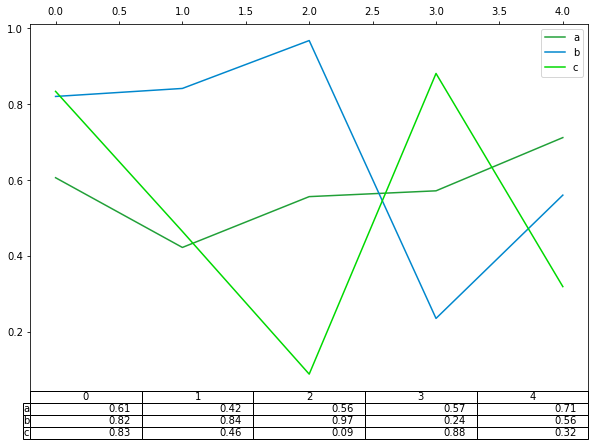

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6.75))
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"])

ax.xaxis.tick_top()  # Display x-axis ticks on top.

df.plot(table=np.round(df.T, 2), ax=ax,  color=newcolors);

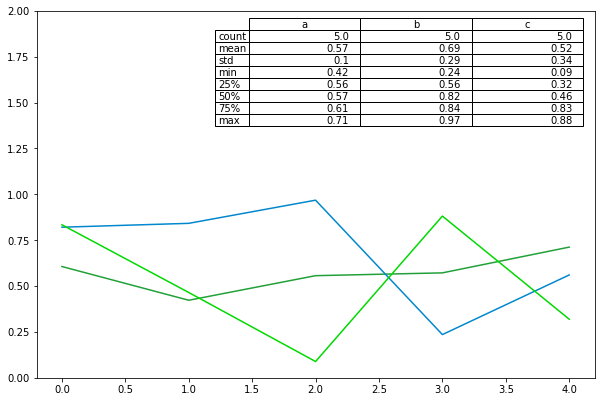

In [41]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1, figsize=(10, 6.75))


table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2]);

df.plot(ax=ax, ylim=(0, 2), legend=None,  color=newcolors);